In [5]:
import warnings
import pandas as pd
import numpy as np
from sklearn.feature_selection import *
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

warnings.filterwarnings('ignore')

#### Load data

<a href=http://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29>Variable description</a>

In [6]:
# specify the location to the data file
data_file = data_file = "German credit data.txt"

# define column names
var_names = [
    "a_status",            #1  Status of existing checking account
    "duration",            #2  Duration in month
    "c_history",           #3  Credit history
    "purpose",             #4  Purpose
    "c_amount",            #5  Credit amount
    "savings",             #6  Savings account/bonds
    "employment",          #7  Present employment since
    "inst_rate",           #8  Installment rate in percentage of disposable income
    "p_status",            #9  Personal status and sex
    "o_debtors",           #10 Other debtors / guarantors
    "residence",           #11 Present residence since
    "property",            #12 Property
    "age",                 #13 Age in years
    "o_inst_plans",        #14 Other isntallment plans
    "housing",             #15 Housing
    "e_credit",            #16 Number of existing credits at this bank
    "job",                 #17 Job
    "ppl_liable",          #18 Number of people being liable to provide maintenance for
    "telephone",           #19 Telephone
    "foreign",             #20 Foreign worker
    "class",               #21 Classification
]

# read from text file
df_data = pd.read_csv(data_file, sep=" ", names=var_names)

# examine data types
df_data.dtypes

a_status        object
duration         int64
c_history       object
purpose         object
c_amount         int64
savings         object
employment      object
inst_rate        int64
p_status        object
o_debtors       object
residence        int64
property        object
age              int64
o_inst_plans    object
housing         object
e_credit         int64
job             object
ppl_liable       int64
telephone       object
foreign         object
class            int64
dtype: object

In [7]:
# examine the top 5 rows of the data frame
df_data.head()

,a_status,duration,c_history,purpose,c_amount,savings,employment,inst_rate,p_status,o_debtors,...,property,age,o_inst_plans,housing,e_credit,job,ppl_liable,telephone,foreign,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [8]:
# get all the discrete attributes
disc_cols = [col for col in df_data.columns if df_data[col].dtype == np.object]
# get all the continous attributes
cont_cols = [col for col in df_data.columns if df_data[col].dtype == np.int64 and col != "class"]

print ("discrete: %d" % len(disc_cols), disc_cols)
print ("continuous: %d" % len(cont_cols), cont_cols)

discrete: 13 ['a_status', 'c_history', 'purpose', 'savings', 'employment', 'p_status', 'o_debtors', 'property', 'o_inst_plans', 'housing', 'job', 'telephone', 'foreign']
continuous: 7 ['duration', 'c_amount', 'inst_rate', 'residence', 'age', 'e_credit', 'ppl_liable']


#### Encode string values to integers

(sklearn classifiers do not take string values as input)

In [9]:
# encode string values to integers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# maintain a dict for string to integer mappings for each column
label_dict = dict()
for col in disc_cols:
    le = LabelEncoder()
    # map the string values
    df_data[col] = le.fit_transform(df_data[col])
    # store the mapping in the dict
    label_dict[col] = dict()
    for cls, label in zip(le.classes_, le.transform(le.classes_)):
        label_dict[col][label] = cls
label_dict

{'a_status': {0: 'A11', 1: 'A12', 2: 'A13', 3: 'A14'},
 'c_history': {0: 'A30', 1: 'A31', 2: 'A32', 3: 'A33', 4: 'A34'},
 'purpose': {0: 'A40',
  1: 'A41',
  2: 'A410',
  3: 'A42',
  4: 'A43',
  5: 'A44',
  6: 'A45',
  7: 'A46',
  8: 'A48',
  9: 'A49'},
 'savings': {0: 'A61', 1: 'A62', 2: 'A63', 3: 'A64', 4: 'A65'},
 'employment': {0: 'A71', 1: 'A72', 2: 'A73', 3: 'A74', 4: 'A75'},
 'p_status': {0: 'A91', 1: 'A92', 2: 'A93', 3: 'A94'},
 'o_debtors': {0: 'A101', 1: 'A102', 2: 'A103'},
 'property': {0: 'A121', 1: 'A122', 2: 'A123', 3: 'A124'},
 'o_inst_plans': {0: 'A141', 1: 'A142', 2: 'A143'},
 'housing': {0: 'A151', 1: 'A152', 2: 'A153'},
 'job': {0: 'A171', 1: 'A172', 2: 'A173', 3: 'A174'},
 'telephone': {0: 'A191', 1: 'A192'},
 'foreign': {0: 'A201', 1: 'A202'}}

In [10]:
#Encoding using dummy variables-Example encoding a_status
a_status_dummies = pd.get_dummies(df_data['a_status'], prefix='a_status')
a_status_dummies

,a_status_0,a_status_1,a_status_2,a_status_3
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
995,0,0,0,1
996,1,0,0,0
997,0,0,0,1
998,1,0,0,0


In [11]:
df_data = pd.concat([df_data, a_status_dummies], axis=1)
df_data.drop('a_status', axis=1, inplace=True)
df_data

,duration,c_history,purpose,c_amount,savings,employment,inst_rate,p_status,o_debtors,residence,...,e_credit,job,ppl_liable,telephone,foreign,class,a_status_0,a_status_1,a_status_2,a_status_3
0,6,4,4,1169,4,4,4,2,0,4,...,2,2,1,1,0,1,1,0,0,0
1,48,2,4,5951,0,2,2,1,0,2,...,1,2,1,0,0,2,0,1,0,0
2,12,4,7,2096,0,3,2,2,0,3,...,1,1,2,0,0,1,0,0,0,1
3,42,2,3,7882,0,3,2,2,2,4,...,1,2,2,0,0,1,1,0,0,0
4,24,3,0,4870,0,2,3,2,0,4,...,2,2,2,0,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,2,3,1736,0,3,3,1,0,4,...,1,1,1,0,0,1,0,0,0,1
996,30,2,1,3857,0,2,4,0,0,4,...,1,3,1,1,0,1,1,0,0,0
997,12,2,4,804,0,4,4,2,0,4,...,1,2,1,0,0,1,0,0,0,1
998,45,2,4,1845,0,2,4,2,0,4,...,1,2,1,1,0,2,1,0,0,0


#### Encode discrete attributes with integer values to factors

In [13]:
""" 
One hot encoding forces sklearn classifiers to treat discrete attributes as factors.

Example:
    The attributes, a_status, has 4 values, 0, 1, 2, and 3.
    One hot encoding encodes the four values of a_status into four binary variables
"""
from sklearn.preprocessing import OneHotEncoder

# make sure you add the n-1 do drop the extra dummy variable.
# add code here.

# create an instance of OneHotEncoder
ohe = OneHotEncoder()

# encode an attribute
# only list of lists can be transformed (pay attention to the double brackets)
encoded = ohe.fit_transform(df_data[["a_status"]])

# compare the original values and the encoded values
for a, b in zip(df_data["a_status"].values, encoded.toarray()):
    print (a, b)
# the encode values of the four new attributes are printed in the brackets

KeyError: "None of [Index(['a_status'], dtype='object')] are in the [columns]"

In [ ]:
#ohe = OneHotEncoder()
#dir(ohe)

In [ ]:
# create a new data frame using one hot encoding

# extract continuous attributes to the new data frame
df_data2 = df_data[cont_cols]

# a container used to store names of the new attributes
ohe_cols = []

# encode each discrete attribute
for col in disc_cols:
    ohe = OneHotEncoder()
    encoded = ohe.fit_transform(df_data[[col]]).toarray()
    #two-dimensional array shape(number of rows, number of columns)
    #print(encoded.shape[1])
    # create names for the new attributes
    #names = [col+"="+str(i) for i in range(encoded.shape[1])]
    names = [col+"="+str(i) for i in range(encoded.shape[1])]
    ohe_cols.extend(names)
    # transform the encoded values to a data frame
    df_encoded = pd.DataFrame(encoded, columns=names)
    # concatenate the data frame with the larger new data frame
    df_data2 = pd.concat([df_data2, df_encoded], axis=1)
df_data2.head()

,duration,c_amount,inst_rate,residence,age,e_credit,ppl_liable,a_status=0,a_status=1,a_status=2,...,housing=1,housing=2,job=0,job=1,job=2,job=3,telephone=0,telephone=1,foreign=0,foreign=1
0,6,1169,4,4,67,2,1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,48,5951,2,2,22,1,1,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,12,2096,2,3,49,1,2,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,42,7882,2,4,45,1,2,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,24,4870,3,4,53,2,2,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
ohe_cols

['a_status=0',
 'a_status=1',
 'a_status=2',
 'a_status=3',
 'c_history=0',
 'c_history=1',
 'c_history=2',
 'c_history=3',
 'c_history=4',
 'purpose=0',
 'purpose=1',
 'purpose=2',
 'purpose=3',
 'purpose=4',
 'purpose=5',
 'purpose=6',
 'purpose=7',
 'purpose=8',
 'purpose=9',
 'savings=0',
 'savings=1',
 'savings=2',
 'savings=3',
 'savings=4',
 'employment=0',
 'employment=1',
 'employment=2',
 'employment=3',
 'employment=4',
 'p_status=0',
 'p_status=1',
 'p_status=2',
 'p_status=3',
 'o_debtors=0',
 'o_debtors=1',
 'o_debtors=2',
 'property=0',
 'property=1',
 'property=2',
 'property=3',
 'o_inst_plans=0',
 'o_inst_plans=1',
 'o_inst_plans=2',
 'housing=0',
 'housing=1',
 'housing=2',
 'job=0',
 'job=1',
 'job=2',
 'job=3',
 'telephone=0',
 'telephone=1',
 'foreign=0',
 'foreign=1']

#### Partition the data set

In [ ]:
from sklearn.model_selection import train_test_split

# partition: train/test = 70/30
train_x, test_x, train_y, test_y = train_test_split(df_data2, df_data["class"], test_size=0.3, random_state=123)

# convert numpy arrays to data frames
df_train_x = pd.DataFrame(train_x, columns=df_data2.columns)
df_test_x = pd.DataFrame(test_x, columns=df_data2.columns)
df_train_y = pd.DataFrame(train_y, columns=["class"])
df_test_y = pd.DataFrame(test_y, columns=["class"])

print ("shapes")
print (df_train_x.shape)
print (df_test_x.shape)
print (df_train_y.shape)
print (df_test_y.shape)

print 

print ("class counts")
print (df_data["class"].value_counts())
print (df_train_y["class"].value_counts())
print (df_test_y["class"].value_counts())
# the class counts show that the sampling is roughly stratified

shapes
(700, 61)
(300, 61)
(700, 1)
(300, 1)
class counts
1    700
2    300
Name: class, dtype: int64
1    500
2    200
Name: class, dtype: int64
1    200
2    100
Name: class, dtype: int64


### <font color="red">Feature select must be performed using only training data</font>

#### Feature Selection (Filter) - Discrete Attributes

In [ ]:
# compute the f value and p value of the chi-squared test between each attribute and the class
f_val, p_val = chi2(df_train_x[ohe_cols], df_train_y["class"]) 

# print the Chi-squared valus and p values
df_scores = pd.DataFrame(zip(ohe_cols, f_val, p_val), columns=["feature", "chi2", "p"])
df_scores["chi2"] = df_scores["chi2"].round(2)
df_scores["p"] = df_scores["p"].round(3)
print (df_scores.sort_values("chi2", ascending=False))

# use features with p < 0.05
sel_ohe_cols = df_scores[df_scores["p"]<0.05]["feature"].values
print ("\nSelected features: %d" % len(sel_ohe_cols))
print (sel_ohe_cols)

           feature   chi2      p
3       a_status=3  34.84  0.000
0       a_status=0  31.38  0.000
5      c_history=1  12.43  0.000
8      c_history=4  11.85  0.001
4      c_history=0  11.20  0.001
10       purpose=1   6.81  0.009
43       housing=0   6.57  0.010
25    employment=1   6.57  0.010
39      property=3   5.31  0.021
23       savings=4   5.16  0.023
1       a_status=1   5.06  0.025
22       savings=3   4.38  0.036
19       savings=0   4.28  0.039
44       housing=1   4.16  0.041
36      property=0   3.91  0.048
45       housing=2   3.75  0.053
27    employment=3   3.71  0.054
53       foreign=1   3.70  0.055
13       purpose=4   3.46  0.063
40  o_inst_plans=0   3.22  0.073
29      p_status=0   3.03  0.082
17       purpose=8   2.80  0.094
9        purpose=0   2.79  0.095
21       savings=2   2.57  0.109
34     o_debtors=1   2.40  0.121
41  o_inst_plans=1   2.24  0.134
16       purpose=7   2.24  0.134
30      p_status=1   2.19  0.139
31      p_status=2   1.90  0.168
28    empl

#### Feature Selection (Filter) - Continuous Attributes

In [ ]:
# select compute the f value and p value of the ANOVA test between each attribute and the class
f_val, p_val = f_classif(df_train_x[cont_cols], df_train_y["class"]) 

# print the Chi-squared valus and p values
df_scores = pd.DataFrame(zip(cont_cols, f_val, p_val), columns=["feature", "f", "p"])
df_scores["f"] = df_scores["f"].round(2)
df_scores["p"] = df_scores["p"].round(3)
print (df_scores.sort_values("f", ascending=False))

# use features with p < 0.05
sel_cont_cols = df_scores[df_scores["p"]<0.05]["feature"].values
print ("\nSelected features: %d" % len(sel_cont_cols))
print (sel_cont_cols)

      feature      f      p
0    duration  37.65  0.000
1    c_amount  13.72  0.000
4         age   5.43  0.020
2   inst_rate   3.39  0.066
5    e_credit   1.39  0.238
3   residence   0.00  0.949
6  ppl_liable   0.00  0.973

Selected features: 3
['duration' 'c_amount' 'age']


In [ ]:
# combine the names of selected attributes
sel_features = np.concatenate([sel_ohe_cols, sel_cont_cols])
sel_features

array(['a_status=0', 'a_status=1', 'a_status=3', 'c_history=0',
       'c_history=1', 'c_history=4', 'purpose=1', 'savings=0',
       'savings=3', 'savings=4', 'employment=1', 'property=0',
       'property=3', 'housing=0', 'housing=1', 'duration', 'c_amount',
       'age'], dtype=object)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(df_train_x[sel_features], train_y)
df_importance = pd.DataFrame(zip(sel_features, clf.feature_importances_), columns=["feature", "score"])
print (df_importance.sort_values("score", ascending=False))
pred_y = clf.predict(df_test_x[sel_features])
print (f1_score(pred_y, test_y))

         feature     score
16      c_amount  0.301449
17           age  0.197847
15      duration  0.153138
2     a_status=3  0.075173
4    c_history=1  0.041629
7      savings=0  0.026745
9      savings=4  0.026594
12    property=3  0.026381
6      purpose=1  0.026167
13     housing=0  0.024937
5    c_history=4  0.024075
14     housing=1  0.020216
10  employment=1  0.014552
0     a_status=0  0.011406
11    property=0  0.011363
8      savings=3  0.007762
3    c_history=0  0.007255
1     a_status=1  0.003310
0.72544080604534


In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf = clf.fit(df_train_x[sel_features], train_y)
#df_importance = pd.DataFrame(zip(df_train_x.columns, clf.coef_[0]), columns=["feature", "weight"])
#df_importance.sort_values("weight", ascending=False)
#print df_importance
pred_y = clf.predict(df_test_x[sel_features])
print (f1_score(pred_y, test_y))

0.8


#### Compare the prediction performance using all feature and that using only selected features

In [ ]:
# Define a function that takes two classifiers as input

def cv(all_clf, sel_clf):
    # adjust the shape 
    train_y = df_train_y["class"].values
    train_y.shape = (len(train_y),)

    # train models
    all_clf = all_clf.fit(df_train_x, train_y)
    sel_clf = sel_clf.fit(df_train_x[sel_features], train_y)

    # make prediction
    all_pred = all_clf.predict(df_test_x)
    sel_pred = sel_clf.predict(df_test_x[sel_features])

    # evaluate the prediction results
    results = [
        ["accuracy", accuracy_score(all_pred, df_test_y["class"]), accuracy_score(sel_pred, df_test_y["class"])],
        ["f1", f1_score(all_pred, df_test_y["class"]), f1_score(sel_pred, df_test_y["class"])],
        ["precision", precision_score(all_pred, df_test_y["class"]), precision_score(sel_pred, df_test_y["class"])],
        ["recall", recall_score(all_pred, df_test_y["class"]), recall_score(sel_pred, df_test_y["class"])],
    ]

    df_results = pd.DataFrame(results, columns=["Metric", "All features", "Selected features"])
    df_results["All features"] = df_results["All features"].round(4)
    df_results["Selected features"] = df_results["Selected features"].round(4)
    print (df_results)

In [ ]:
from sklearn import tree

all_clf = tree.DecisionTreeClassifier()
sel_clf = tree.DecisionTreeClassifier()

cv(all_clf, sel_clf)

      Metric  All features  Selected features
0   accuracy        0.6567             0.6900
1         f1        0.7444             0.7681
2  precision        0.7500             0.7700
3     recall        0.7389             0.7662


In [ ]:
from sklearn.svm import LinearSVC

all_clf = LinearSVC(random_state=123456)
sel_clf = LinearSVC(random_state=123456)

cv(all_clf, sel_clf)

      Metric  All features  Selected features
0   accuracy        0.6667             0.6667
1         f1        0.8000             0.8000
2  precision        1.0000             1.0000
3     recall        0.6667             0.6667


In [ ]:
from sklearn.linear_model import RidgeClassifier

all_clf = RidgeClassifier()
sel_clf = RidgeClassifier()

cv(all_clf, sel_clf)

      Metric  All features  Selected features
0   accuracy        0.7500             0.7533
1         f1        0.8210             0.8287
2  precision        0.8600             0.8950
3     recall        0.7854             0.7716


In [ ]:
from sklearn.linear_model import LogisticRegression

all_clf = LogisticRegression()
sel_clf = LogisticRegression()

cv(all_clf, sel_clf)

      Metric  All features  Selected features
0   accuracy        0.7500             0.7367
1         f1        0.8193             0.8167
2  precision        0.8500             0.8800
3     recall        0.7907             0.7619


In [ ]:
from sklearn.naive_bayes import BernoulliNB

all_clf = BernoulliNB()
sel_clf = BernoulliNB()

cv(all_clf, sel_clf)

      Metric  All features  Selected features
0   accuracy        0.7600             0.7333
1         f1        0.8218             0.8010
2  precision        0.8300             0.8050
3     recall        0.8137             0.7970


In [ ]:
from sklearn.ensemble import RandomForestClassifier

all_clf = RandomForestClassifier()
sel_clf = RandomForestClassifier()

cv(all_clf, sel_clf)

      Metric  All features  Selected features
0   accuracy        0.7000             0.7433
1         f1        0.8009             0.8254
2  precision        0.9050             0.9100
3     recall        0.7183             0.7552


In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(df_train_x, train_y)
pred_y = clf.predict(df_test_x)
print ("F1 using all features: %.4f" % f1_score(pred_y, test_y))

clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(df_train_x[sel_features], train_y)
pred_y = clf.predict(df_test_x[sel_features])
print ("F1 using filter features: %.4f" % f1_score(pred_y, test_y))

F1 using all features: 0.7654
F1 using filter features: 0.7212


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf = clf.fit(df_train_x, train_y)
pred_y = clf.predict(df_test_x)
print ("F1 using all features: %.4f" % f1_score(pred_y, test_y))

clf = RandomForestClassifier()
clf = clf.fit(df_train_x[sel_features], train_y)
pred_y = clf.predict(df_test_x[sel_features])
print ("F1 using filter features: %.4f" % f1_score(pred_y, test_y))

F1 using all features: 0.8009
F1 using filter features: 0.8037


In [ ]:
clf = RidgeClassifier()
clf = clf.fit(df_train_x, train_y)
pred_y = clf.predict(df_test_x)
print ("F1 using all features: %.4f" % f1_score(pred_y, test_y))

clf = RidgeClassifier()
clf = clf.fit(df_train_x[sel_features], train_y)
pred_y = clf.predict(df_test_x[sel_features])
print ("F1 using filter features: %.4f" % f1_score(pred_y, test_y))

F1 using all features: 0.8210
F1 using filter features: 0.8287


In [ ]:
clf = BernoulliNB()
clf = clf.fit(df_train_x, train_y)
pred_y = clf.predict(df_test_x)
print ("F1 using all features: %.4f" % f1_score(pred_y, test_y))

clf = BernoulliNB()
clf = clf.fit(df_train_x[sel_features], train_y)
pred_y = clf.predict(df_test_x[sel_features])
print ("F1 using filter features: %.4f" % f1_score(pred_y, test_y))

F1 using all features: 0.8218
F1 using filter features: 0.8010


# Feature Selection - Embedded

In [ ]:
from sklearn import tree
# adjust the shape
train_y = df_train_y["class"].values
train_y.shape = (len(train_y),)

clf = tree.DecisionTreeClassifier(criterion="entropy", max_features=40, random_state=10241024)
clf = clf.fit(df_train_x, train_y)
df_importance = pd.DataFrame(zip(df_train_x.columns, clf.feature_importances_), columns=["feature", "score"])
# print df_importance.sort("score", ascending=False)
pred_y = clf.predict(df_test_x)
print (f1_score(pred_y, test_y))


clf = tree.DecisionTreeClassifier(criterion="entropy", max_features=20, random_state=10241024)
clf = clf.fit(df_train_x, train_y)
df_importance = pd.DataFrame(zip(df_train_x.columns, clf.feature_importances_), columns=["feature", "score"])
# print df_importance.sort("score", ascending=False)
pred_y = clf.predict(df_test_x)
print (f1_score(pred_y, test_y))

0.7733990147783252
0.7901234567901235


# Recursive feature selection with cross validation (rfecv)

In [ ]:
# encode string values to integers
from sklearn.preprocessing import LabelEncoder

# maintain a dict for string to integer mappings for each column
label_dict = dict()
for var_name in var_names:
    # only map string values
    if df_data[var_name].dtype == np.object:
        le = LabelEncoder()
        # map the string values
        df_data[var_name] = le.fit_transform(df_data[var_name])
        # store the mapping in the dict
        label_dict[var_name] = dict()
        for cls, label in zip(le.classes_, le.transform(le.classes_)):
            label_dict[var_name][label] = cls
label_dict

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

#X = df_data.drop('class', axis=1)
X = df_data2
target = df_data['class']
#1- estimator — your model instance
#2- step — number of features to remove at each iteration
#3- cv — your Cross-Validation, use StratifiedKFold and set K to 10
#4- scoring — scoring metric, what you want to optimize for. I’ve used ‘accuracy’ but you can select any other
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators='warn', n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 52


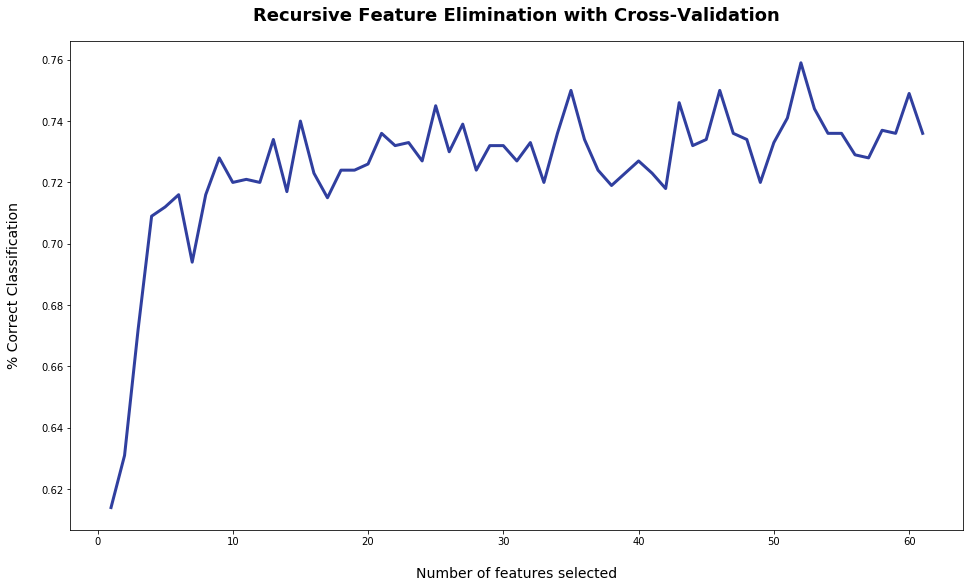

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()